In [141]:
from os.path import join
from os import listdir
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import requests
import xml.etree.ElementTree as ET
from lxml import etree
from io import BytesIO
import statistics

In [110]:
import sys,os,os.path
os.environ['HTTP_PROXY']="http://172.16.2.30:8080"
os.environ['HTTPS_PROXY']="http://172.16.2.30:8080"

In [111]:
input_path = "../data/pubmed_ids"

In [112]:
df = pd.read_csv("../../output/AllDiseaseClincalTrialWithPubmed.csv")
df.shape

(41034, 10)

In [113]:
files = listdir(input_path)

In [114]:
# for nct in nctsDif:
#     print(int(df.loc[df['nct_id'] == nct].pub_med_id))
#     fp = open(join(input_path, nct+".txt"), "w")
#     fp.write(str(int(df.loc[df['nct_id'] == nct].pub_med_id))+"\n")

In [115]:
print(len(files))

41034


In [116]:
nctIdsRet = [file.split(".")[0] for file in files]

In [117]:
df_nctIds = set(df.nct_id)
nctIdsRet = set(nctIdsRet)
print(len(df_nctIds), len(nctIdsRet))

41034 41034


In [118]:
nctsDif = df_nctIds.difference(nctIdsRet)
nctsDif

set()

In [119]:
nctIdToPubmed = {}
for file in files:
#     print(file)
    nct = file.split(".")[0]
    fp = open(join(input_path, file), "r")
    pubmedIds = fp.readlines()
    fp.close()
#     print(pubmedIds)
    pubmedIds = [pubmed.strip() for pubmed in pubmedIds]
    
    nctIdToPubmed[nct] = ";".join(pubmedIds)

In [149]:
pickle.dump(nctIdToPubmed, open("../data/nctIdToPubmed.p", "wb"))

In [150]:
nctIdToPubmed['NCT02974998']

'29996792'

In [121]:
pubmedCountInEachNct = []
for nct in nctIdToPubmed:
#     print(nctIdToPubmed[nct])
    pubMedCount = len(str(nctIdToPubmed[nct]).split(";"))
    pubmedCountInEachNct.append(pubMedCount)

In [122]:
pubmedCountInEachNct[:5]

[1, 1, 1, 1, 3]

In [123]:
print("Maximum:", max(pubmedCountInEachNct))

Maximum: 128


In [124]:
len(set(pubmedCountInEachNct))

48

In [131]:
numOfPubmedEntriesIndexAsLen = np.zeros(max(pubmedCountInEachNct)+1)
for numOfPubmed in pubmedCountInEachNct:
    numOfPubmedEntriesIndexAsLen[numOfPubmed] += 1

(array([3.0969e+04, 5.7470e+03, 2.0820e+03, 8.9500e+02, 4.4500e+02,
        2.6500e+02, 1.5500e+02, 1.1800e+02, 9.3000e+01, 4.7000e+01,
        4.2000e+01, 2.3000e+01, 2.4000e+01, 2.2000e+01, 6.0000e+00,
        7.0000e+00, 1.5000e+01, 9.0000e+00, 7.0000e+00, 3.0000e+00,
        4.0000e+00, 3.0000e+00, 3.0000e+00, 5.0000e+00, 4.0000e+00,
        3.0000e+00, 2.0000e+00, 2.0000e+00, 3.0000e+00, 4.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 2.0000e+00,
        1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        4.0000e+00, 3.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 1.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 0.0000e+00, 0.00

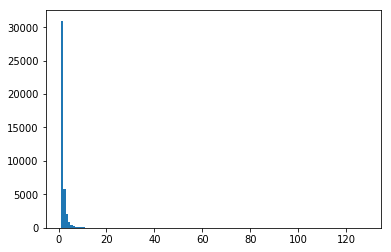

In [132]:
plt.hist(pubmedCountInEachNct, bins=max(pubmedCountInEachNct))

MaximumPubmed: 128
Mean: 1.5547350977238388
Median: 1.0


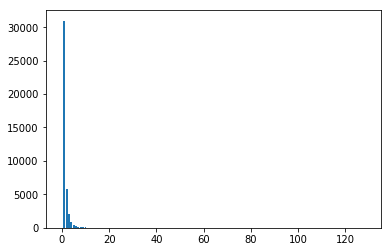

In [143]:
plt.bar(range(max(pubmedCountInEachNct)+1), height=numOfPubmedEntriesIndexAsLen)
print("MaximumPubmed:", max(pubmedCountInEachNct))
print("Mean:", statistics.mean(pubmedCountInEachNct))
print("Median:", statistics.median(pubmedCountInEachNct))

In [137]:
count = 0
nctToRet = []
for nct in nctIdToPubmed:
#     print(nctIdToPubmed[nct])
    
    if len(str(nctIdToPubmed[nct]).split(";")) == 128:
        print(nct)
        count += 1
        nctToRet.append(nct)
print(count)

NCT00000611
1


In [ ]:
def citationCount(item):
    fp = open("../../data/newCitedByMoreThan20/" + str(item) +".txt", "r")
    data = fp.read()
    fp.close()
    
    pubMedId = file.split(".")[0]
    citationCount = data.count("<Link>")
    return citationCount

In [100]:
def retrievePubmedCitations(pubMedToFetch):
    count = 0
    totArticles = len(pubMedToFetch)
    for item in set(pubMedToFetch):
        print(item)
        try:
            link = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id="+str(item)
            # link = "https://www.ncbi.nlm.nih.gov/pubmed?linkname=pubmed_pubmed_citedin&from_uid=" + str(item) + "&report=uilist&format=tex"
            # link = "https://www.ncbi.nlm.nih.gov/pubmed?linkname=pubmed_pubmed_citedin&from_uid=" + str(item) + "&report=uilist&format=tex"
            print("Link:", link)
            response = requests.get(link)
#             print("Response:", response)
            with open("../../data/newCitedByMoreThan20/" + str(item) +".txt", 'wb') as file:
                file.write(response.content)
        except:
            fp.write(str(item) + "\n")
            pass

        if(count%100 == 0):
            print(count/totArticles)

        count += 1

In [104]:
def retrievePubmedGivenNct(remNct):
    pubMedToFetch = []
    for nct in remNct:
        print("Nct", nct)
        link = "https://eutils.ncbi.nlm.nih.gov/entrez/eutils/esearch.fcgi?dbfrom=pubmed&term=" + nct + "%20[si]&RetMax=10000"
        # link = "https://www.ncbi.nlm.nih.gov/pubmed?linkname=pubmed_pubmed_citedin&from_uid=" + str(item) + "&report=uilist&format=tex"
        # link = "https://www.ncbi.nlm.nih.gov/pubmed?linkname=pubmed_pubmed_citedin&from_uid=" + str(item) + "&report=uilist&format=tex"
        # print("Link:", link)

        response = requests.get(link)
        data = response.content
        file = BytesIO(data)

        # print("DataBefore:", data)
        # print(type(data))
        # data_new = data.decode(encoding='UTF-8')
        # data_new = data_new.replace("\n", "")

        # print("DataAfter:", data_new)
        dataToWrite = ""
        count = 1
        for event, element in etree.iterparse(file, tag='Id'):
            id = element.text
            pubMedToFetch.append(id)
#             print("id", id)
            dataToWrite += id + "\n"
            count += 1
#         print("data:", dataToWrite)
        
        with open("../data/pubmed_ids/" + str(nct) +".txt", 'w') as file:
            file.write(dataToWrite)
        print(count)
    retrievePubmedCitations(pubMedToFetch)

In [105]:
print(nctToRet)
retrievePubmedGivenNct(nctToRet)

['NCT00017953', 'NCT01240902', 'NCT00766584', 'NCT00000479', 'NCT00412984', 'NCT01020916', 'NCT00781391', 'NCT00433966', 'NCT00360893', 'NCT00002540', 'NCT00391872', 'NCT00153101', 'NCT00093158', 'NCT00059306', 'NCT00435734', 'NCT00617084', 'NCT00004992', 'NCT00038727', 'NCT01035255', 'NCT01174875', 'NCT00000620', 'NCT00000611', 'NCT00006164', 'NCT01332136', 'NCT00007657', 'NCT00005487', 'NCT00212134', 'NCT00360815', 'NCT00856856', 'NCT00072995', 'NCT00699998', 'NCT00344513', 'NCT00023595', 'NCT00047437', 'NCT00716079', 'NCT00223600', 'NCT00004732', 'NCT00115934', 'NCT00114972', 'NCT00069784', 'NCT00979589', 'NCT00180271', 'NCT00370214', 'NCT00021528', 'NCT00006305', 'NCT00867048', 'NCT00470587', 'NCT00027352', 'NCT00262600', 'NCT00338260', 'NCT00289237', 'NCT00530894', 'NCT00094302', 'NCT00145925', 'NCT00390637', 'NCT00000542', 'NCT00292552', 'NCT00608764', 'NCT00403767', 'NCT00014001', 'NCT00092677', 'NCT00088699', 'NCT00327691']
Nct NCT00017953
63
Nct NCT01240902
21
Nct NCT00766584


Response: <Response [200]>
26323282
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26323282
Response: <Response [200]>
25295436
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25295436
Response: <Response [200]>
23947473
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23947473
Response: <Response [200]>
28404658
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28404658
Response: <Response [200]>
23688929
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23688929
Response: <Response [200]>
28858443
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28858443
Response: <Response [200]>
17276184
Link: https://eutils.ncbi.nl

Response: <Response [200]>
23796131
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23796131
Response: <Response [200]>
25923552
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25923552
Response: <Response [200]>
23770182
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23770182
Response: <Response [200]>
27313280
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27313280
Response: <Response [200]>
23800556
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23800556
Response: <Response [200]>
28446501
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28446501
Response: <Response [200]>
22483327
Link: https://eutils.ncbi.nl

Response: <Response [200]>
24016496
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24016496
Response: <Response [200]>
29773949
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29773949
Response: <Response [200]>
25301831
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25301831
Response: <Response [200]>
29157582
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29157582
Response: <Response [200]>
26113170
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26113170
Response: <Response [200]>
22721655
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22721655
Response: <Response [200]>
25249300
Link: https://eutils.ncbi.nl

Response: <Response [200]>
18839134
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=18839134
Response: <Response [200]>
25112662
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25112662
Response: <Response [200]>
25439371
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25439371
Response: <Response [200]>
0.08900756564307966
25736441
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25736441
Response: <Response [200]>
27438938
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27438938
Response: <Response [200]>
29728717
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29728717
Response: <Response [200]>
21372613
Link: ht

Response: <Response [200]>
26141008
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26141008
Response: <Response [200]>
23816018
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23816018
Response: <Response [200]>
23199555
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23199555
Response: <Response [200]>
25855668
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25855668
Response: <Response [200]>
27289122
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27289122
Response: <Response [200]>
26724489
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26724489
Response: <Response [200]>
27056882
Link: https://eutils.ncbi.nl

Response: <Response [200]>
24963007
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24963007
Response: <Response [200]>
26415764
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26415764
Response: <Response [200]>
26853953
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26853953
Response: <Response [200]>
26961303
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26961303
Response: <Response [200]>
20697028
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20697028
Response: <Response [200]>
30012318
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30012318
Response: <Response [200]>
27878892
Link: https://eutils.ncbi.nl

Response: <Response [200]>
24016497
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24016497
Response: <Response [200]>
26584339
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26584339
Response: <Response [200]>
25963221
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25963221
Response: <Response [200]>
23184565
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23184565
Response: <Response [200]>
18981767
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=18981767
Response: <Response [200]>
25908766
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25908766
Response: <Response [200]>
26122922
Link: https://eutils.ncbi.nl

Response: <Response [200]>
23359362
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23359362
Response: <Response [200]>
22427534
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22427534
Response: <Response [200]>
20961243
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20961243
Response: <Response [200]>
26084944
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26084944
Response: <Response [200]>
25403646
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25403646
Response: <Response [200]>
26864236
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26864236
Response: <Response [200]>
29021207
Link: https://eutils.ncbi.nl

Response: <Response [200]>
19225038
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19225038
Response: <Response [200]>
18757085
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=18757085
Response: <Response [200]>
29324968
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29324968
Response: <Response [200]>
25641086
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25641086
Response: <Response [200]>
17996820
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=17996820
Response: <Response [200]>
22695506
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22695506
Response: <Response [200]>
19878986
Link: https://eutils.ncbi.nl

Response: <Response [200]>
22575312
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22575312
Response: <Response [200]>
28679551
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28679551
Response: <Response [200]>
19822825
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19822825
Response: <Response [200]>
19898830
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19898830
Response: <Response [200]>
24595629
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24595629
Response: <Response [200]>
24743440
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24743440
Response: <Response [200]>
22750086
Link: https://eutils.ncbi.nl

Response: <Response [200]>
19403636
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19403636
Response: <Response [200]>
27288278
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27288278
Response: <Response [200]>
28515068
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28515068
Response: <Response [200]>
26378687
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26378687
Response: <Response [200]>
23636237
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23636237
Response: <Response [200]>
30513095
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30513095
Response: <Response [200]>
22914552
Link: https://eutils.ncbi.nl

Response: <Response [200]>
25711327
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25711327
Response: <Response [200]>
22571902
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22571902
Response: <Response [200]>
24188226
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24188226
Response: <Response [200]>
24661748
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24661748
Response: <Response [200]>
26624926
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26624926
Response: <Response [200]>
22496114
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22496114
Response: <Response [200]>
23480899
Link: https://eutils.ncbi.nl

Response: <Response [200]>
18703470
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=18703470
Response: <Response [200]>
22980299
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22980299
Response: <Response [200]>
18043905
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=18043905
Response: <Response [200]>
24107587
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24107587
Response: <Response [200]>
21742107
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21742107
Response: <Response [200]>
27932413
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27932413
Response: <Response [200]>
29268751
Link: https://eutils.ncbi.nl

Response: <Response [200]>
22753306
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22753306
Response: <Response [200]>
26265125
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26265125
Response: <Response [200]>
25589782
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25589782
Response: <Response [200]>
26253612
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26253612
Response: <Response [200]>
25340854
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25340854
Response: <Response [200]>
22719022
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22719022
Response: <Response [200]>
23899210
Link: https://eutils.ncbi.nl

Response: <Response [200]>
27438111
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27438111
Response: <Response [200]>
26900641
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26900641
Response: <Response [200]>
21723591
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21723591
Response: <Response [200]>
22036837
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22036837
Response: <Response [200]>
23174632
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23174632
Response: <Response [200]>
19555842
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19555842
Response: <Response [200]>
20446945
Link: https://eutils.ncbi.nl

Response: <Response [200]>
25127725
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25127725
Response: <Response [200]>
21959345
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21959345
Response: <Response [200]>
25711331
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25711331
Response: <Response [200]>
23896681
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23896681
Response: <Response [200]>
21396809
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21396809
Response: <Response [200]>
23613255
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23613255
Response: <Response [200]>
17643576
Link: https://eutils.ncbi.nl

Response: <Response [200]>
24291783
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24291783
Response: <Response [200]>
21685437
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21685437
Response: <Response [200]>
21757572
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21757572
Response: <Response [200]>
29358194
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29358194
Response: <Response [200]>
29636050
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29636050
Response: <Response [200]>
23159552
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23159552
Response: <Response [200]>
25032995
Link: https://eutils.ncbi.nl

Response: <Response [200]>
30168635
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30168635
Response: <Response [200]>
28895655
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28895655
Response: <Response [200]>
23936756
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23936756
Response: <Response [200]>
21911782
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21911782
Response: <Response [200]>
20647564
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20647564
Response: <Response [200]>
27679583
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27679583
Response: <Response [200]>
28520924
Link: https://eutils.ncbi.nl

Response: <Response [200]>
30562068
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30562068
Response: <Response [200]>
26479222
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26479222
Response: <Response [200]>
22821614
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22821614
Response: <Response [200]>
26808615
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26808615
Response: <Response [200]>
29759576
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29759576
Response: <Response [200]>
24723428
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24723428
Response: <Response [200]>
25700755
Link: https://eutils.ncbi.nl

Response: <Response [200]>
17341712
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=17341712
Response: <Response [200]>
20803190
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20803190
Response: <Response [200]>
29352007
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29352007
Response: <Response [200]>
19204221
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19204221
Response: <Response [200]>
25847979
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25847979
Response: <Response [200]>
28193194
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28193194
Response: <Response [200]>
22584648
Link: https://eutils.ncbi.nl

Response: <Response [200]>
24431279
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24431279
Response: <Response [200]>
30571562
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30571562
Response: <Response [200]>
0.48954161103693816
25443696
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25443696
Response: <Response [200]>
25835440
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25835440
Response: <Response [200]>
19770395
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19770395
Response: <Response [200]>
27174798
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27174798
Response: <Response [200]>
21996385
Link: ht

Response: <Response [200]>
30169752
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30169752
Response: <Response [200]>
29501806
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29501806
Response: <Response [200]>
27763941
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27763941
Response: <Response [200]>
21880803
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21880803
Response: <Response [200]>
30373671
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30373671
Response: <Response [200]>
24226808
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24226808
Response: <Response [200]>
25613307
Link: https://eutils.ncbi.nl

Response: <Response [200]>
24880739
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24880739
Response: <Response [200]>
24170751
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24170751
Response: <Response [200]>
26518765
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26518765
Response: <Response [200]>
23164485
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23164485
Response: <Response [200]>
27443429
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27443429
Response: <Response [200]>
29335020
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29335020
Response: <Response [200]>
26089177
Link: https://eutils.ncbi.nl

Response: <Response [200]>
19423530
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19423530
Response: <Response [200]>
22421340
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22421340
Response: <Response [200]>
30742211
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30742211
Response: <Response [200]>
21371282
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21371282
Response: <Response [200]>
25043685
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25043685
Response: <Response [200]>
25172198
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25172198
Response: <Response [200]>
29653643
Link: https://eutils.ncbi.nl

Response: <Response [200]>
21459430
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21459430
Response: <Response [200]>
28837885
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28837885
Response: <Response [200]>
29617523
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29617523
Response: <Response [200]>
17646603
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=17646603
Response: <Response [200]>
20854235
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20854235
Response: <Response [200]>
24317794
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24317794
Response: <Response [200]>
24178969
Link: https://eutils.ncbi.nl

Response: <Response [200]>
27056738
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27056738
Response: <Response [200]>
23534416
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23534416
Response: <Response [200]>
19351942
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19351942
Response: <Response [200]>
21665265
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21665265
Response: <Response [200]>
22363056
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22363056
Response: <Response [200]>
24335056
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24335056
Response: <Response [200]>
19192454
Link: https://eutils.ncbi.nl

Response: <Response [200]>
23561231
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23561231
Response: <Response [200]>
22932256
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22932256
Response: <Response [200]>
24794140
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24794140
Response: <Response [200]>
26198286
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26198286
Response: <Response [200]>
28959461
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28959461
Response: <Response [200]>
20142447
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20142447
Response: <Response [200]>
19717846
Link: https://eutils.ncbi.nl

Response: <Response [200]>
28126156
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28126156
Response: <Response [200]>
26634245
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26634245
Response: <Response [200]>
29387432
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29387432
Response: <Response [200]>
23640971
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23640971
Response: <Response [200]>
29531766
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29531766
Response: <Response [200]>
21474838
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21474838
Response: <Response [200]>
23200803
Link: https://eutils.ncbi.nl

Response: <Response [200]>
19782791
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19782791
Response: <Response [200]>
20594588
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20594588
Response: <Response [200]>
24726579
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24726579
Response: <Response [200]>
23761102
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23761102
Response: <Response [200]>
24576541
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24576541
Response: <Response [200]>
26848185
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26848185
Response: <Response [200]>
29748353
Link: https://eutils.ncbi.nl

Response: <Response [200]>
22686416
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22686416
Response: <Response [200]>
24879844
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24879844
Response: <Response [200]>
23929781
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23929781
Response: <Response [200]>
26836938
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26836938
Response: <Response [200]>
20679587
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20679587
Response: <Response [200]>
23663813
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23663813
Response: <Response [200]>
27655442
Link: https://eutils.ncbi.nl

Response: <Response [200]>
23194494
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23194494
Response: <Response [200]>
24722493
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24722493
Response: <Response [200]>
30590387
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30590387
Response: <Response [200]>
18519471
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=18519471
Response: <Response [200]>
26011509
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26011509
Response: <Response [200]>
19297565
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19297565
Response: <Response [200]>
27815186
Link: https://eutils.ncbi.nl

Response: <Response [200]>
17332146
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=17332146
Response: <Response [200]>
28698175
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28698175
Response: <Response [200]>
28433206
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28433206
Response: <Response [200]>
27756783
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27756783
Response: <Response [200]>
19460609
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19460609
Response: <Response [200]>
25097243
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25097243
Response: <Response [200]>
27296201
Link: https://eutils.ncbi.nl

Response: <Response [200]>
26292584
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26292584
Response: <Response [200]>
24709691
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24709691
Response: <Response [200]>
23661722
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23661722
Response: <Response [200]>
25801872
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25801872
Response: <Response [200]>
17161253
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=17161253
Response: <Response [200]>
26818781
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26818781
Response: <Response [200]>
17637939
Link: https://eutils.ncbi.nl

Response: <Response [200]>
16554525
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=16554525
Response: <Response [200]>
18799002
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=18799002
Response: <Response [200]>
26821198
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26821198
Response: <Response [200]>
27298069
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27298069
Response: <Response [200]>
23425539
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23425539
Response: <Response [200]>
30929973
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30929973
Response: <Response [200]>
28954920
Link: https://eutils.ncbi.nl

Response: <Response [200]>
26221665
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26221665
Response: <Response [200]>
27488238
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27488238
Response: <Response [200]>
28330651
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28330651
Response: <Response [200]>
26040806
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26040806
Response: <Response [200]>
22049171
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22049171
Response: <Response [200]>
19291787
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19291787
Response: <Response [200]>
26597976
Link: https://eutils.ncbi.nl

Response: <Response [200]>
19158205
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19158205
Response: <Response [200]>
29555305
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29555305
Response: <Response [200]>
25356881
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25356881
Response: <Response [200]>
26179186
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26179186
Response: <Response [200]>
25296268
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25296268
Response: <Response [200]>
23040580
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23040580
Response: <Response [200]>
25079603
Link: https://eutils.ncbi.nl

Response: <Response [200]>
19341509
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=19341509
Response: <Response [200]>
22933451
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=22933451
Response: <Response [200]>
25451430
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25451430
Response: <Response [200]>
21525191
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21525191
Response: <Response [200]>
30475965
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30475965
Response: <Response [200]>
21482968
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21482968
Response: <Response [200]>
23703723
Link: https://eutils.ncbi.nl

Response: <Response [200]>
25019562
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=25019562
Response: <Response [200]>
0.8900756564307967
30865842
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30865842
Response: <Response [200]>
29609000
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29609000
Response: <Response [200]>
24819256
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24819256
Response: <Response [200]>
23036896
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=23036896
Response: <Response [200]>
28500216
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28500216
Response: <Response [200]>
22490878
Link: htt

Response: <Response [200]>
26637834
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=26637834
Response: <Response [200]>
29191852
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29191852
Response: <Response [200]>
30744680
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=30744680
Response: <Response [200]>
27411699
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=27411699
Response: <Response [200]>
21463150
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21463150
Response: <Response [200]>
20682679
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20682679
Response: <Response [200]>
20833684
Link: https://eutils.ncbi.nl

Response: <Response [200]>
29079563
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=29079563
Response: <Response [200]>
20422738
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=20422738
Response: <Response [200]>
21359517
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21359517
Response: <Response [200]>
28329198
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=28329198
Response: <Response [200]>
21836103
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=21836103
Response: <Response [200]>
24145457
Link: https://eutils.ncbi.nlm.nih.gov/entrez/eutils/elink.fcgi?dbfrom=pubmed&linkname=pubmed_pubmed_citedin&id=24145457
Response: <Response [200]>
27437665
Link: https://eutils.ncbi.nl